In [4]:

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My\ Drive/google_colab_datasets
%ls




# Functions to read and show images.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('mnist_784_csv.csv')

print(d0.head(5)) # print first five rows of d0.
print(d0.shape)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/google_colab_datasets
mnist_784_csv.csv
   pixel1  pixel2  pixel3  pixel4  ...  pixel782  pixel783  pixel784  class
0       0       0       0       0  ...         0         0         0      5
1       0       0       0       0  ...         0         0         0      0
2       0       0       0       0  ...         0         0         0      4
3       0       0       0       0  ...         0         0         0      1
4       0       0       0       0  ...         0         0         0      9

[5 rows x 785 columns]
(70000, 785)


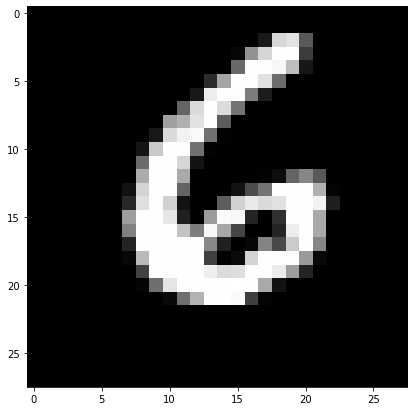

6


In [5]:
# display or plot a number.
plt.figure(figsize=(7,7))
idx = 90
l0=d0["class"]
d0=d0.drop("class",axis=1)
grid_data = d0.iloc[idx].values.reshape(28,28)  # reshape from 1d to 2d pixel array
plt.imshow(grid_data, interpolation = "none", cmap = "gray")
plt.show()

print(l0[idx])

In [6]:

d=d0.head(15000)
l=l0.head(15000)
print(d.shape)
print(l.shape)

(15000, 784)
(15000,)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)
scaler.fit(d)
d_standard=scaler.transform(d,copy=False)
print(d_standard.shape)

(15000, 784)


In [8]:
s=np.matmul(d_standard.T,d_standard)
print(s.shape)

(784, 784)


In [9]:

from scipy.linalg import eigh 

# the parameter 'eigvals' is defined (low value to heigh value) 
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (782 and 783) eigenvalues.
values, vectors = eigh(s, eigvals=(782,783))
print(values.shape)
print(vectors.shape)

(2,)
(784, 2)


In [10]:
pca_mat=np.matmul(d_standard,vectors)
print(pca_mat.shape)

(15000, 2)


In [11]:
import pandas as pd
pca_mat=pca_mat.T
new_coordinates = np.vstack((pca_mat, l)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


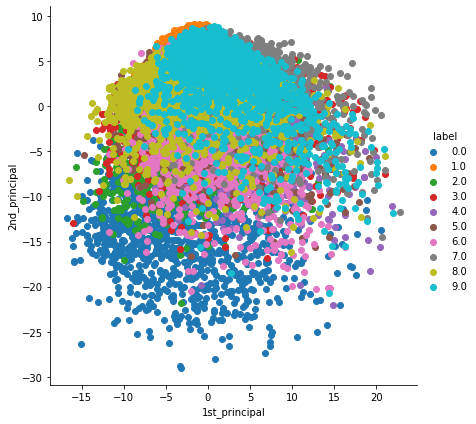

In [12]:
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

In [13]:
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(d_standard)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


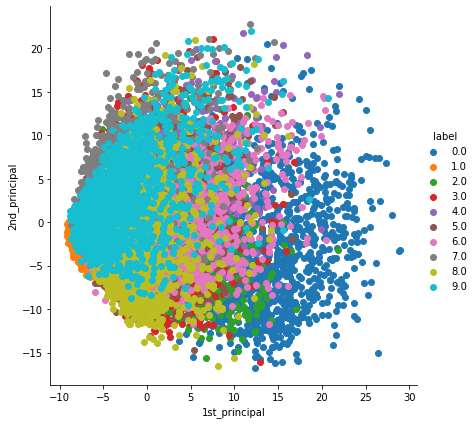

In [15]:
# attaching the label for each 2-d data point 
pca_data = np.vstack((pca_data.T, l)).T

# creating a new data fram which help us in ploting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

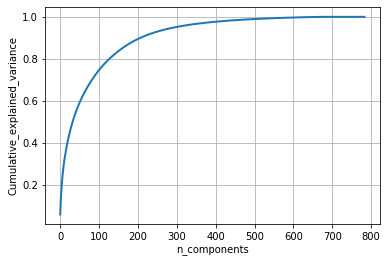

In [16]:
# PCA for dimensionality redcution (non-visualization)

pca.n_components = 784
pca_data = pca.fit_transform(d_standard)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()
